<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Credit Card Fraud Detection Using Machine Learning
 </h1>

Customer ID:   The Customer ID is a unique identification number given to every Customer holding a Bank 

Name:  Name of customer 

Age: Age of customer  

gender: Male/Female 

owns car: Whether The person owns a car or not 

owns house: Whether The person owns a House or not

No_of_children: Number of children to the account holder

net_yearly_income: Net yearly income of the person

no_of_days_employed: No of Days the person

occupation_type: Occupation type     

total_family_members: Total Family member of account holder

migrant_worker: Account holder is migrant or native

yearly_debt_payments: Making payments back yearly to bank

credit limit: Maximum amount of credit a financial institution extends to a client card

credit_limit_used (%): Credit Limit is the maximum amount that you can spend using your credit card at any given time

credit score: A credit score is a number between 300–850 that depicts a consumer's creditworthiness.

prev_defaults:Default in last few years

default_in_last_6months: Default in last 6 months 

credit_card_default: whether the person is Default or not


<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">LIBRARIES
 </h1>

In [2]:
#import pandas  
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib for visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' for visualization 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,f1_score

# import function to perform feature selection
from sklearn.feature_selection import RFE


from imblearn.over_sampling import SMOTE


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# load the csv file
# store the data in 'df_train'
df_train = pd.read_csv('train.csv')

# display first five observations using head()
df_train.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
5,CST_123268,Sarah Marsh,46,F,Y,N,0.0,252765.91,2898.0,Accountants,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
6,CST_127502,Mason,38,M,N,Y,1.0,262389.20,5541.0,High skill tech staff,3.0,0.0,50839.39,41311.08,42,733.0,0,0,0
7,CST_151722,Saba,46,F,Y,Y,1.0,241211.39,1448.0,Core staff,3.0,0.0,30008.46,32209.22,91,906.0,0,0,0
8,CST_133768,Ashutosh,40,F,NaN,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
9,CST_111670,David Milliken,39,F,Y,Y,2.0,207109.13,2791.0,High skill tech staff,4.0,0.0,9509.10,28425.52,14,666.0,0,0,0


<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">DataSet Shape
 </h1>

In [4]:
#.shape to check the dimension of data
df_train.shape

(45528, 19)

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Data type of a variable
 </h1>

In [5]:
df_train.dtypes

customer_id                 object
name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
credit_card_default          int64
dtype: object

In [6]:
df_train.isnull().sum().sort_values(ascending=False)

no_of_children             774
owns_car                   547
no_of_days_employed        463
yearly_debt_payments        95
migrant_worker              87
total_family_members        83
credit_score                 8
customer_id                  0
default_in_last_6months      0
prev_defaults                0
credit_limit_used(%)         0
credit_limit                 0
occupation_type              0
name                         0
net_yearly_income            0
owns_house                   0
gender                       0
age                          0
credit_card_default          0
dtype: int64

<AxesSubplot:>

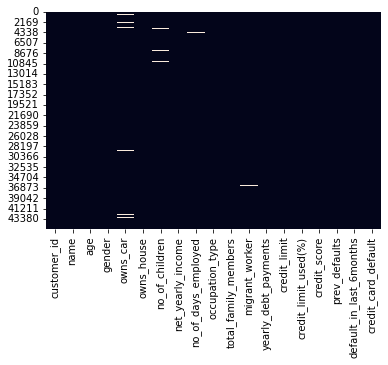

In [7]:
sns.heatmap(df_train.isnull(),cbar=False)

In [111]:
df_train.isnull().sum()*100/df_train.isnull().count()

age                        0.0
gender                     0.0
owns_car                   0.0
owns_house                 0.0
no_of_children             0.0
net_yearly_income          0.0
no_of_days_employed        0.0
occupation_type            0.0
total_family_members       0.0
migrant_worker             0.0
yearly_debt_payments       0.0
credit_limit               0.0
credit_limit_used(%)       0.0
credit_score               0.0
prev_defaults              0.0
default_in_last_6months    0.0
credit_card_default        0.0
dtype: float64

In [112]:
df_train.skew()

age                        0.003192
no_of_children             1.578334
net_yearly_income          1.636790
no_of_days_employed        1.761004
total_family_members       0.805299
migrant_worker             1.365251
yearly_debt_payments       1.534883
credit_limit               1.930994
credit_limit_used(%)      -0.139146
credit_score              -0.299876
prev_defaults              4.494197
default_in_last_6months    3.939948
credit_card_default        2.922461
dtype: float64

In [120]:
df_train['gender'] = df_train['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df_train['gender'].value_counts()

F    23186
M    13928
Name: gender, dtype: int64

In [121]:
df_train['no_of_children']=df_train['no_of_children'].fillna(df_train['no_of_children'].mode()[0])
df_train['no_of_children'].isnull().sum()

    

0

In [122]:
df_train['owns_car']=df_train['owns_car'].fillna(df_train['owns_car'].mode()[0])
df_train['owns_car'].isnull().sum()

0

In [123]:
df_train['migrant_worker']=df_train['migrant_worker'].fillna(df_train['migrant_worker'].mode()[0])
df_train['migrant_worker'].isnull().sum()

0

In [124]:
df_train['no_of_days_employed']=df_train['no_of_days_employed'].fillna(df_train['no_of_days_employed'].median())
df_train['yearly_debt_payments']=df_train['yearly_debt_payments'].fillna(df_train['yearly_debt_payments'].median())

df_train['credit_score']=df_train['credit_score'].fillna(df_train['credit_score'].median())

In [125]:
df_train['total_family_members']=df_train['total_family_members'].fillna(df_train['total_family_members'].mode()[0])
df_train['total_family_members'].isnull().sum()

0

In [126]:
df_train['occupation_type']=df_train['occupation_type'].replace({'Unknown':'Others'})
df_train['occupation_type']

0             Others
1           Laborers
2           Laborers
3         Core staff
4         Core staff
            ...     
45523         Others
45524    Accountants
45525     Core staff
45526       Laborers
45527         Others
Name: occupation_type, Length: 37114, dtype: object

In [127]:
df_train.isnull().sum()*100/df_train.isnull().count()

age                        0.0
gender                     0.0
owns_car                   0.0
owns_house                 0.0
no_of_children             0.0
net_yearly_income          0.0
no_of_days_employed        0.0
occupation_type            0.0
total_family_members       0.0
migrant_worker             0.0
yearly_debt_payments       0.0
credit_limit               0.0
credit_limit_used(%)       0.0
credit_score               0.0
prev_defaults              0.0
default_in_last_6months    0.0
credit_card_default        0.0
dtype: float64

In [128]:
df_train['credit_score'].isnull().sum()

0

<AxesSubplot:>

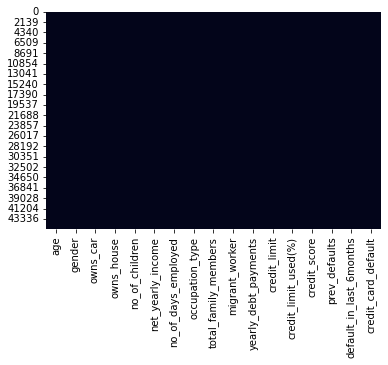

In [129]:
sns.heatmap(df_train.isnull(),cbar=False)

<AxesSubplot:xlabel='no_of_days_employed', ylabel='Density'>

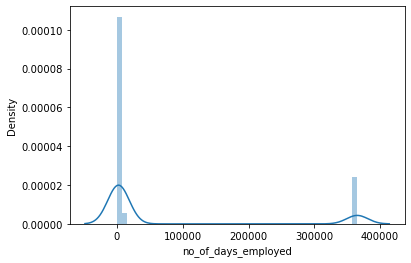

In [20]:
sns.distplot(df_train['no_of_days_employed'])

In [21]:
df_train['no_of_days_employed'].quantile([0.25, 0.5, 0.75, 0.8185, 0.99, 1.0])

0.2500       946.750
0.5000      2224.000
0.7500      5687.500
0.8185     12796.495
0.9900    365252.000
1.0000    365252.000
Name: no_of_days_employed, dtype: float64

In [22]:
new_trainTEST_data = df_train[df_train['no_of_days_employed']>df_train['no_of_days_employed'].quantile(0.8185)]
new_trainTEST_data

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
12,CST_147654,Baker,39,F,N,Y,0.0,68421.10,365247.0,Others,2.0,0.0,13781.53,17110.01,72,643.0,1,1,1
29,CST_149142,"ODonnell""",26,M,Y,N,0.0,172067.42,365251.0,Others,2.0,0.0,24199.23,22155.88,49,886.0,0,0,0
32,CST_119708,Anna Driver,32,M,Y,N,0.0,206413.69,365247.0,Others,2.0,0.0,22419.59,74423.73,72,766.0,0,0,0
45,CST_105775,Diane Bartz,50,F,Y,Y,0.0,173396.95,365241.0,Others,1.0,0.0,10764.89,28296.94,3,811.0,0,0,0
48,CST_165701,da,48,F,N,N,0.0,145514.36,365240.0,Others,1.0,0.0,27222.39,39851.78,22,717.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45509,CST_160135,Sullivan,28,F,N,N,0.0,109872.55,365252.0,Others,2.0,0.0,17022.95,23985.85,56,798.0,0,0,0
45510,CST_116622,Fredrik Dahl,38,F,N,Y,0.0,52827.82,365242.0,Others,2.0,0.0,19245.70,13756.60,13,907.0,0,0,0
45512,CST_101246,Emily Kaiser,24,F,N,Y,0.0,140729.06,365251.0,Others,2.0,0.0,18350.70,15661.53,27,752.0,0,0,0
45513,CST_120555,"""John ODonnell""",49,M,N,Y,0.0,223193.44,365242.0,Others,2.0,0.0,19881.38,48985.19,72,940.0,0,0,0


In [23]:
df_train= df_train[df_train['no_of_days_employed']<=df_train['no_of_days_employed'].quantile(0.8185)]
df_train.shape

(37264, 19)

<AxesSubplot:xlabel='no_of_days_employed', ylabel='Density'>

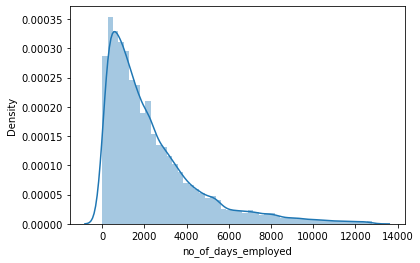

In [24]:
sns.distplot(df_train['no_of_days_employed'])

<AxesSubplot:xlabel='net_yearly_income', ylabel='Density'>

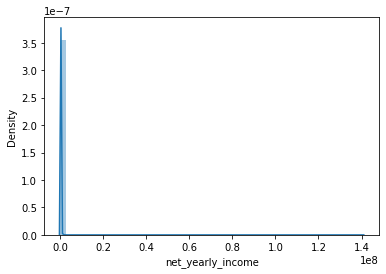

In [25]:
sns.distplot(df_train['net_yearly_income'])

In [26]:
df_train['net_yearly_income'].quantile([0.25, 0.5, 0.75, 0.99, 0.998, 1.0])

0.250    1.340261e+05
0.500    1.791919e+05
0.750    2.482265e+05
0.990    6.119582e+05
0.998    9.501911e+05
1.000    1.407590e+08
Name: net_yearly_income, dtype: float64

<AxesSubplot:xlabel='net_yearly_income', ylabel='Density'>

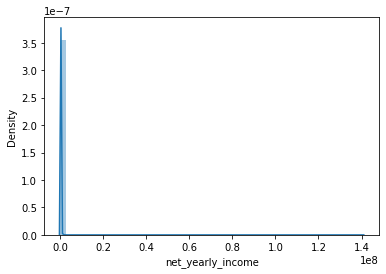

In [27]:
sns.distplot(df_train['net_yearly_income'])

In [29]:
df_train=df_train[df_train['net_yearly_income']<df_train['net_yearly_income'].quantile(0.998)]

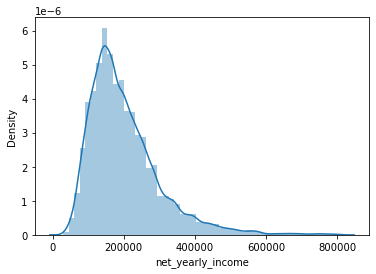

In [30]:
sns.distplot(df_train['net_yearly_income'])
plt.show()

In [31]:
default_values=df_train.credit_card_default.value_counts(ascending=False).values
default_values

array([33871,  3243], dtype=int64)

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Univariate Analysis
 </h1>

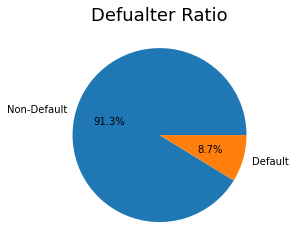

In [32]:
default_values=df_train.credit_card_default.value_counts(ascending=False).values

plt.pie(default_values,labels=['Non-Default','Default'],autopct='%1.1f%%')
plt.title('Defualter Ratio',fontsize=18)
plt.show()

In [33]:
owns_Car=df_train.owns_car.value_counts()
owns_Car

N    23490
Y    13624
Name: owns_car, dtype: int64

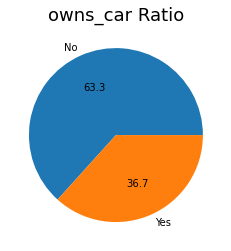

In [34]:
owns_Car=df_train.owns_car.value_counts(ascending=False).values
plt.pie(owns_Car,labels=['No','Yes'],autopct='%1.1f')
plt.title('owns_car Ratio',fontsize=18)
plt.show()

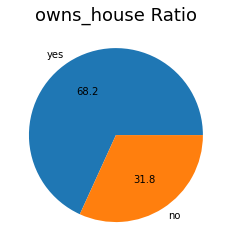

In [35]:
owns_house=df_train.owns_house.value_counts(ascending=False).values
plt.pie(owns_house,labels=['yes','no'],autopct='%1.1f')
plt.title('owns_house Ratio',fontsize=18)
plt.show()

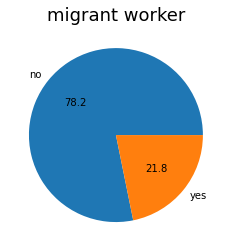

In [36]:
migrant_worker=df_train.migrant_worker.value_counts()
plt.pie(migrant_worker,labels=['no','yes'],autopct='%1.1f')
plt.title('migrant worker' ,fontsize=18)
plt.show()

<AxesSubplot:>

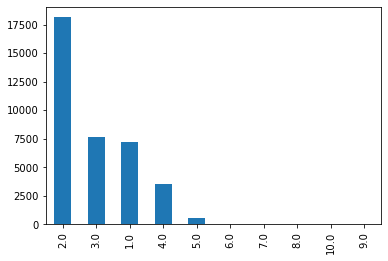

In [37]:
df_train['total_family_members'].value_counts().plot(kind='bar')

<AxesSubplot:>

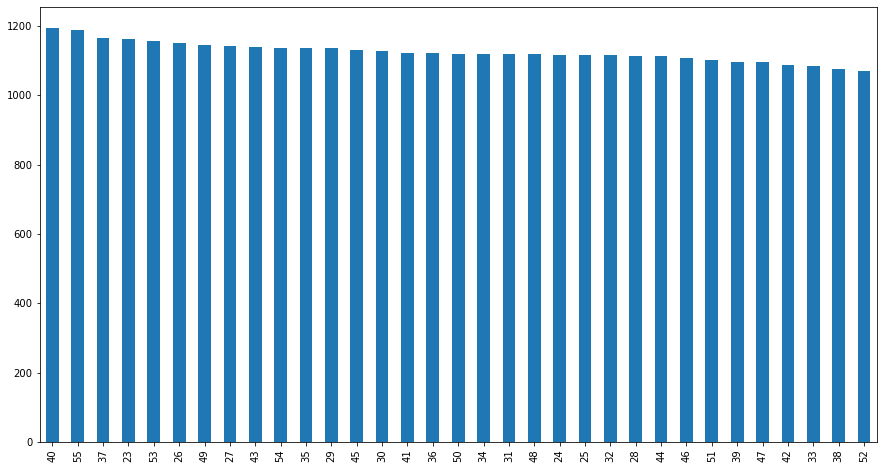

In [38]:
plt.figure(figsize=[15,8])
df_train['age'].value_counts().plot(kind='bar')

In [39]:
df_train.columns

Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

<AxesSubplot:xlabel='yearly_debt_payments', ylabel='Density'>

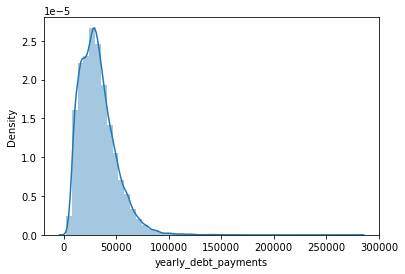

In [40]:
sns.distplot(df_train['yearly_debt_payments'])

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Bivariate Analysis
 </h1>

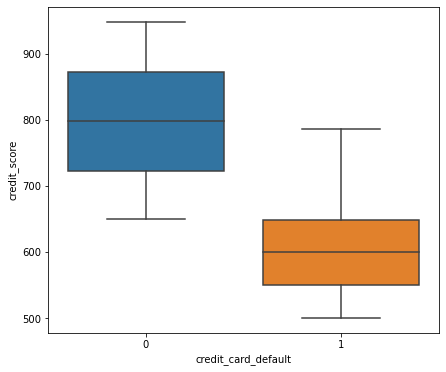

In [41]:
plt.figure(figsize=[7,6])
sns.boxplot(df_train['credit_card_default'], df_train['credit_score'])
plt.show()

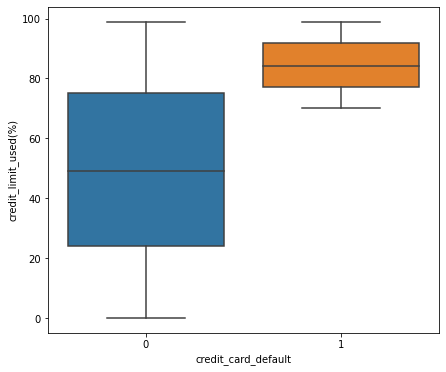

In [42]:
plt.figure(figsize=[7,6])
sns.boxplot(df_train['credit_card_default'], df_train['credit_limit_used(%)'])
plt.show()

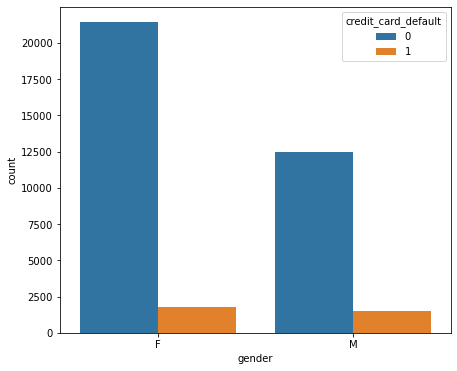

In [43]:
plt.figure(figsize=[7,6])
sns.countplot(df_train['gender'], hue=df_train['credit_card_default'])
plt.show()

<AxesSubplot:xlabel='occupation_type', ylabel='net_yearly_income'>

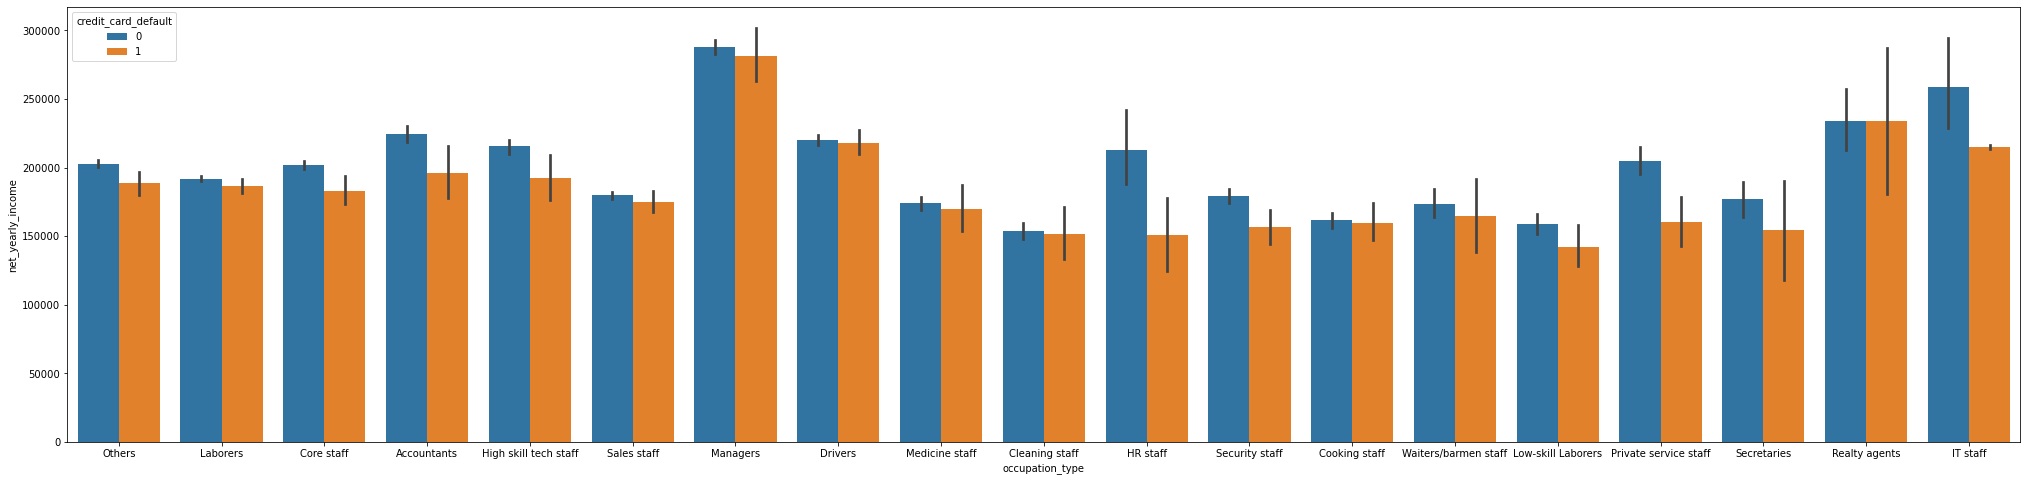

In [44]:
plt.figure(figsize=[35,8])
sns.barplot(df_train['occupation_type'],df_train['net_yearly_income'],hue=df_train['credit_card_default'])

In [46]:
df_train['occupation_type'].value_counts()

Laborers                 8087
Others                   6139
Sales staff              4718
Core staff               4042
Managers                 3062
Drivers                  2740
High skill tech staff    1663
Accountants              1459
Medicine staff           1256
Security staff           1023
Cooking staff             899
Cleaning staff            663
Private service staff     386
Low-skill Laborers        336
Waiters/barmen staff      203
Secretaries               194
Realty agents             101
HR staff                   77
IT staff                   66
Name: occupation_type, dtype: int64

<AxesSubplot:>

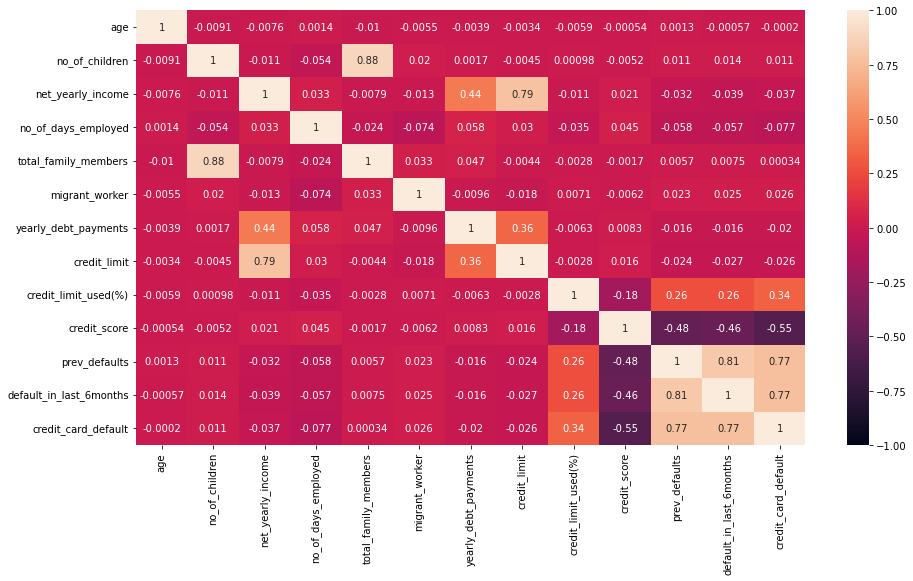

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(),annot=True,vmax=1,vmin=-1)

Text(0.5, 1.0, 'credit_score boxplot')

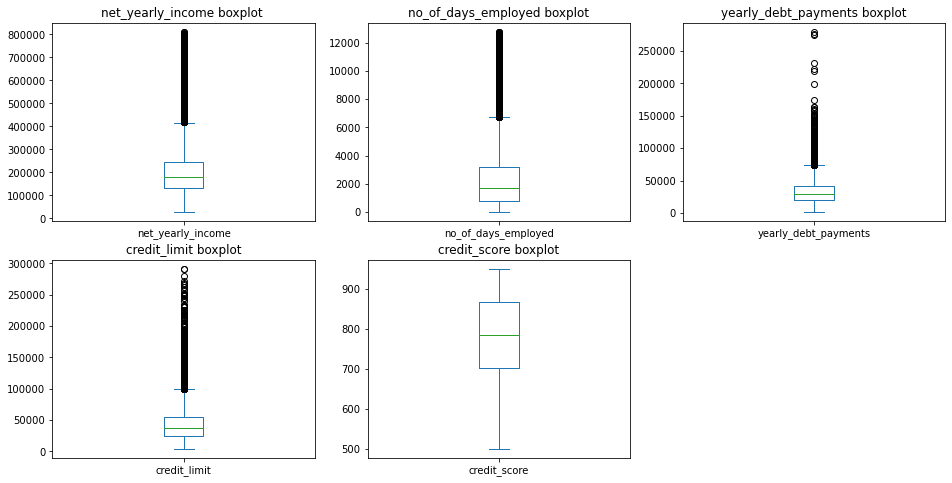

In [48]:
plt.figure(figsize=[16,8])
plt.subplot(2,3,1)
df_train['net_yearly_income'].plot(kind='box')
plt.title('net_yearly_income boxplot ')


plt.subplot(2,3,2)
df_train['no_of_days_employed'].plot(kind='box')
plt.title('no_of_days_employed boxplot')

plt.subplot(2,3,3)
df_train['yearly_debt_payments'].plot(kind='box')
plt.title('yearly_debt_payments boxplot')

plt.subplot(2,3,4)
df_train['credit_limit'].plot(kind='box')
plt.title('credit_limit boxplot')

plt.subplot(2,3,5)
df_train['credit_score'].plot(kind='box')
plt.title('credit_score boxplot')


<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Data Preparation
 </h1>

In [49]:
df_train=df_train.drop(['customer_id','name',],1)

<AxesSubplot:>

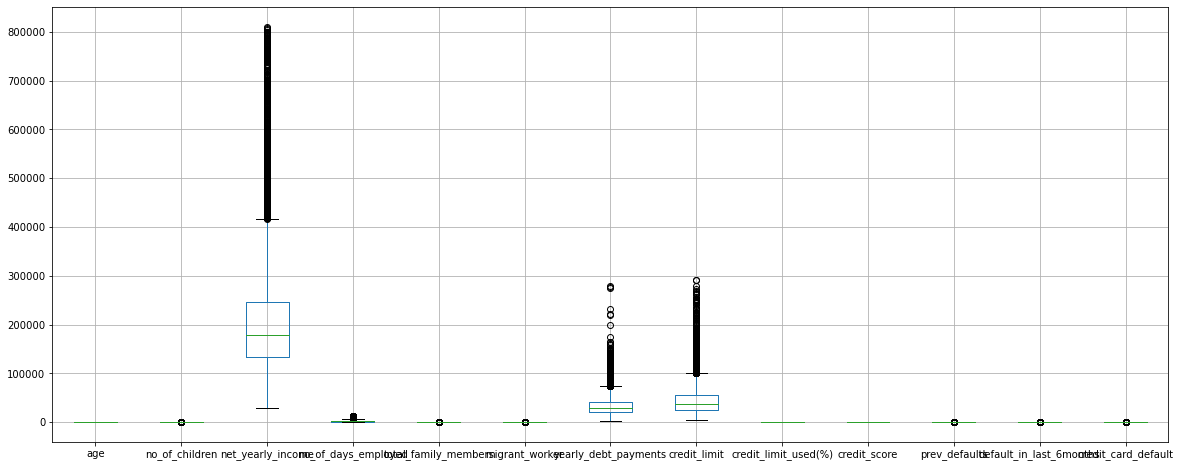

In [50]:
plt.figure(figsize=(20,8))
df_train.boxplot()

In [51]:
num_col=df_train.select_dtypes(np.number)
num_col

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,55,2.0,96207.57,117.0,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,31,0.0,383476.74,966.0,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,27,0.0,260052.18,1420.0,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,32,0.0,157363.04,2457.0,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


In [52]:
cat_col=df_train.select_dtypes(include='object')
cat_col

,gender,owns_car,owns_house,occupation_type
0,F,N,Y,Others
1,M,N,Y,Laborers
2,M,N,Y,Laborers
3,F,N,Y,Core staff
4,M,Y,Y,Core staff
...,...,...,...,...
45523,F,N,N,Others
45524,F,N,Y,Accountants
45525,F,N,Y,Core staff
45526,M,Y,N,Laborers


In [53]:
cat_col=pd.get_dummies(cat_col,drop_first=True)

In [54]:
x=pd.concat([num_col,cat_col],1)
x

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,...,0,0,0,1,0,0,0,0,0,0
1,29,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,55,2.0,96207.57,117.0,4.0,0.0,11229.54,29663.83,82,907.0,...,0,0,0,1,0,0,0,0,0,0
45524,31,0.0,383476.74,966.0,2.0,1.0,43369.91,139947.16,32,679.0,...,0,0,0,0,0,0,0,0,0,0
45525,27,0.0,260052.18,1420.0,2.0,0.0,22707.51,83961.83,46,727.0,...,0,0,0,0,0,0,0,0,0,0
45526,32,0.0,157363.04,2457.0,2.0,0.0,20150.10,25538.72,92,805.0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
x=x.drop('credit_card_default',1)


In [56]:
y=df_train['credit_card_default']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25979, 33)
(11135, 33)
(25979,)
(11135,)


In [58]:
sc=StandardScaler()
x_train_sc=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_sc=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [59]:
x_train.isnull().sum()

age                                      0
no_of_children                           0
net_yearly_income                        0
no_of_days_employed                      0
total_family_members                     0
migrant_worker                           0
yearly_debt_payments                     0
credit_limit                             0
credit_limit_used(%)                     0
credit_score                             0
prev_defaults                            0
default_in_last_6months                  0
gender_M                                 0
owns_car_Y                               0
owns_house_Y                             0
occupation_type_Cleaning staff           0
occupation_type_Cooking staff            0
occupation_type_Core staff               0
occupation_type_Drivers                  0
occupation_type_HR staff                 0
occupation_type_High skill tech staff    0
occupation_type_IT staff                 0
occupation_type_Laborers                 0
occupation_

In [56]:
# # Using ADASYN to oversample

# from imblearn.over_sampling import ADASYN
# X_train_res, y_train_res = ADASYN().fit_resample(x_train, y_train)

# from collections import Counter
# print(sorted(Counter(y_train_res).items()))

In [60]:
sm=SMOTE(random_state=10)
X_train,y_train=sm.fit_resample(x_train,y_train)

In [61]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (47332, 33)
Dimension of y_train_sm Shape: (47332,)


In [62]:
y_train=y_train.values.reshape(-1,1)

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Model building
 </h1>

LOGESTIC REGRESSION

In [63]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

In [64]:
y_train_pred = logreg.predict(X_train)
y_train_pred.shape

(47332,)

In [65]:
y_test_pred = logreg.predict(x_test)

[[21730  1936]
 [ 1114 22552]]


<AxesSubplot:>

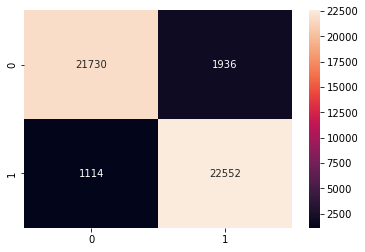

In [66]:
print(confusion_matrix(y_train, y_train_pred))

cm=confusion_matrix(y_train,y_train_pred)
sns.heatmap(cm,annot=True,fmt='.5g')

In [67]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [68]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_train,y_train_pred)

0.8716490707519616

In [69]:
matthews_corrcoef(y_test,y_test_pred)

0.6335266713567419

In [70]:
Mcc=(TP*TN-FP*FN)/np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
Mcc

0.8716490707519616

In [71]:
TP+TN/TP+TN+FP+FN

47332.96355090458

In [69]:
TP/TP+FP

1939.0

In [70]:
TP/TP+FN

1057.0

In [72]:
Train_accuracy=(accuracy_score(y_train,y_train_pred))
Test_accuracy=(accuracy_score(y_test,y_test_pred))

In [73]:
print('Logestic Regression train score:',Train_accuracy)
print('Logestic Regression test score:',Test_accuracy)

Logestic Regression train score: 0.9355615651145103
Logestic Regression test score: 0.9139649753030984


In [74]:
print(f1_score(y_train,y_train_pred))

0.9366615442123187


In [75]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     23666
           1       0.92      0.95      0.94     23666

    accuracy                           0.94     47332
   macro avg       0.94      0.94      0.94     47332
weighted avg       0.94      0.94      0.94     47332



[[9325  880]
 [  78  852]]


<AxesSubplot:>

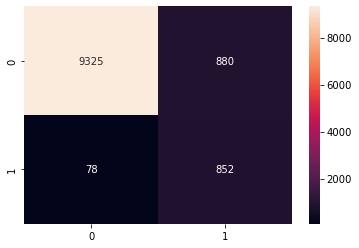

In [76]:
print(confusion_matrix(y_test, y_test_pred))

cm=confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm,annot=True,fmt='.5g')

In [77]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [79]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     10205
           1       0.49      0.92      0.64       930

    accuracy                           0.91     11135
   macro avg       0.74      0.91      0.80     11135
weighted avg       0.95      0.91      0.93     11135



In [80]:
print(accuracy_score(y_test,y_test_pred))

0.9139649753030984


In [81]:
print(f1_score(y_test,y_test_pred))

0.6401202103681443


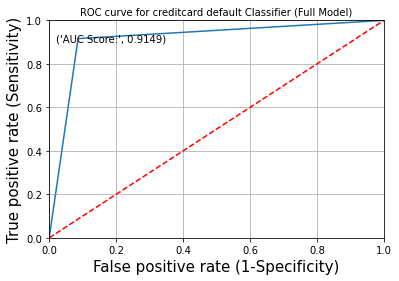

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for creditcard default Classifier (Full Model)', fontsize = 10)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_test_pred),4)))
                               
# plot the grid
plt.grid(True)

In [83]:
DT_model=DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
y_train_pred=DT_model.predict(X_train)
y_test_pred=DT_model.predict(x_test)

In [85]:
accuracy_score(y_train,y_train_pred)

1.0

In [86]:
accuracy_score(y_test,y_test_pred)

0.9687471935339022

[[9980  225]
 [ 123  807]]


<AxesSubplot:>

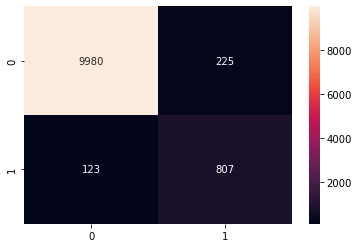

In [87]:
print(confusion_matrix(y_test, y_test_pred))

cm=confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm,annot=True,fmt='.5g')

In [88]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [89]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23666
           1       1.00      1.00      1.00     23666

    accuracy                           1.00     47332
   macro avg       1.00      1.00      1.00     47332
weighted avg       1.00      1.00      1.00     47332



In [90]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10205
           1       0.78      0.87      0.82       930

    accuracy                           0.97     11135
   macro avg       0.88      0.92      0.90     11135
weighted avg       0.97      0.97      0.97     11135



In [91]:
imp = list(DT_model.feature_importances_)
feat_imp = pd.DataFrame(columns = ['feature_name','Importance'])
feat_imp['feature_name'] = x.columns
feat_imp['Importance'] = imp
feat_imp[1:]


,feature_name,Importance
1,no_of_children,0.003291
2,net_yearly_income,0.005481
3,no_of_days_employed,0.008336
4,total_family_members,0.002472
5,migrant_worker,0.001094
6,yearly_debt_payments,0.007489
7,credit_limit,0.006853
8,credit_limit_used(%),0.157254
9,credit_score,0.775374
10,prev_defaults,0.000000


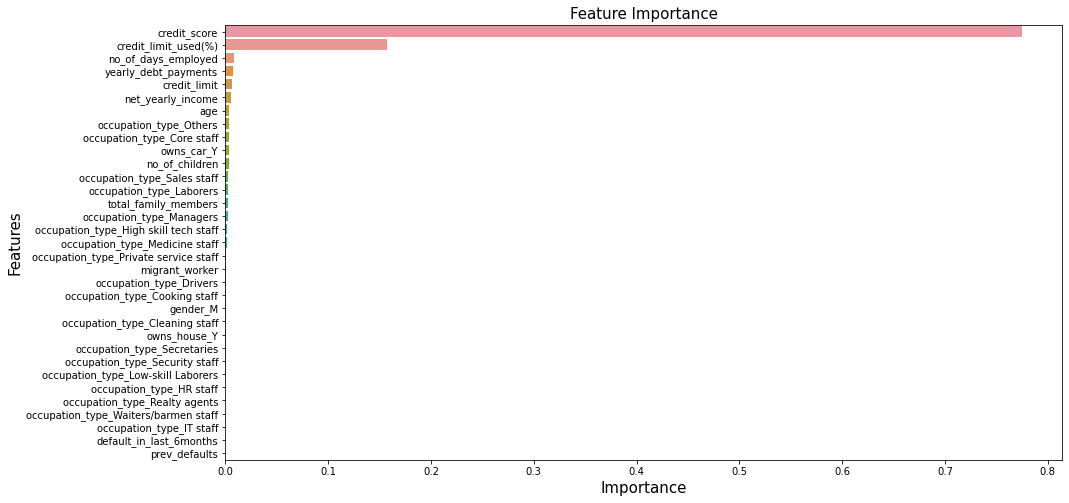

In [92]:
plt.figure(figsize=[15,8])
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': DT_model.feature_importances_})


important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

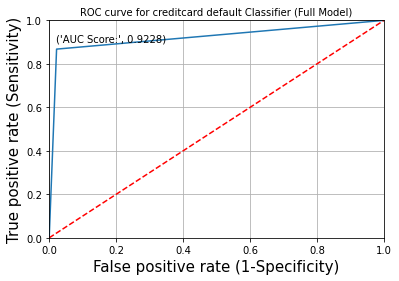

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for creditcard default Classifier (Full Model)', fontsize = 10)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_test_pred),4)))
                               
# plot the grid
plt.grid(True)

In [94]:
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
Total=FP+TP+FN+TN

misclassified_prct=((FP+FN)/Total)*100

correctly_classified_prct=((TN+TP)/Total)*100

print(specificity)
print(sensitivity)
print(misclassified_prct)
print(correctly_classified_prct)

0.9779519843214111
0.867741935483871
3.125280646609789
96.87471935339022


In [95]:
from sklearn import tree

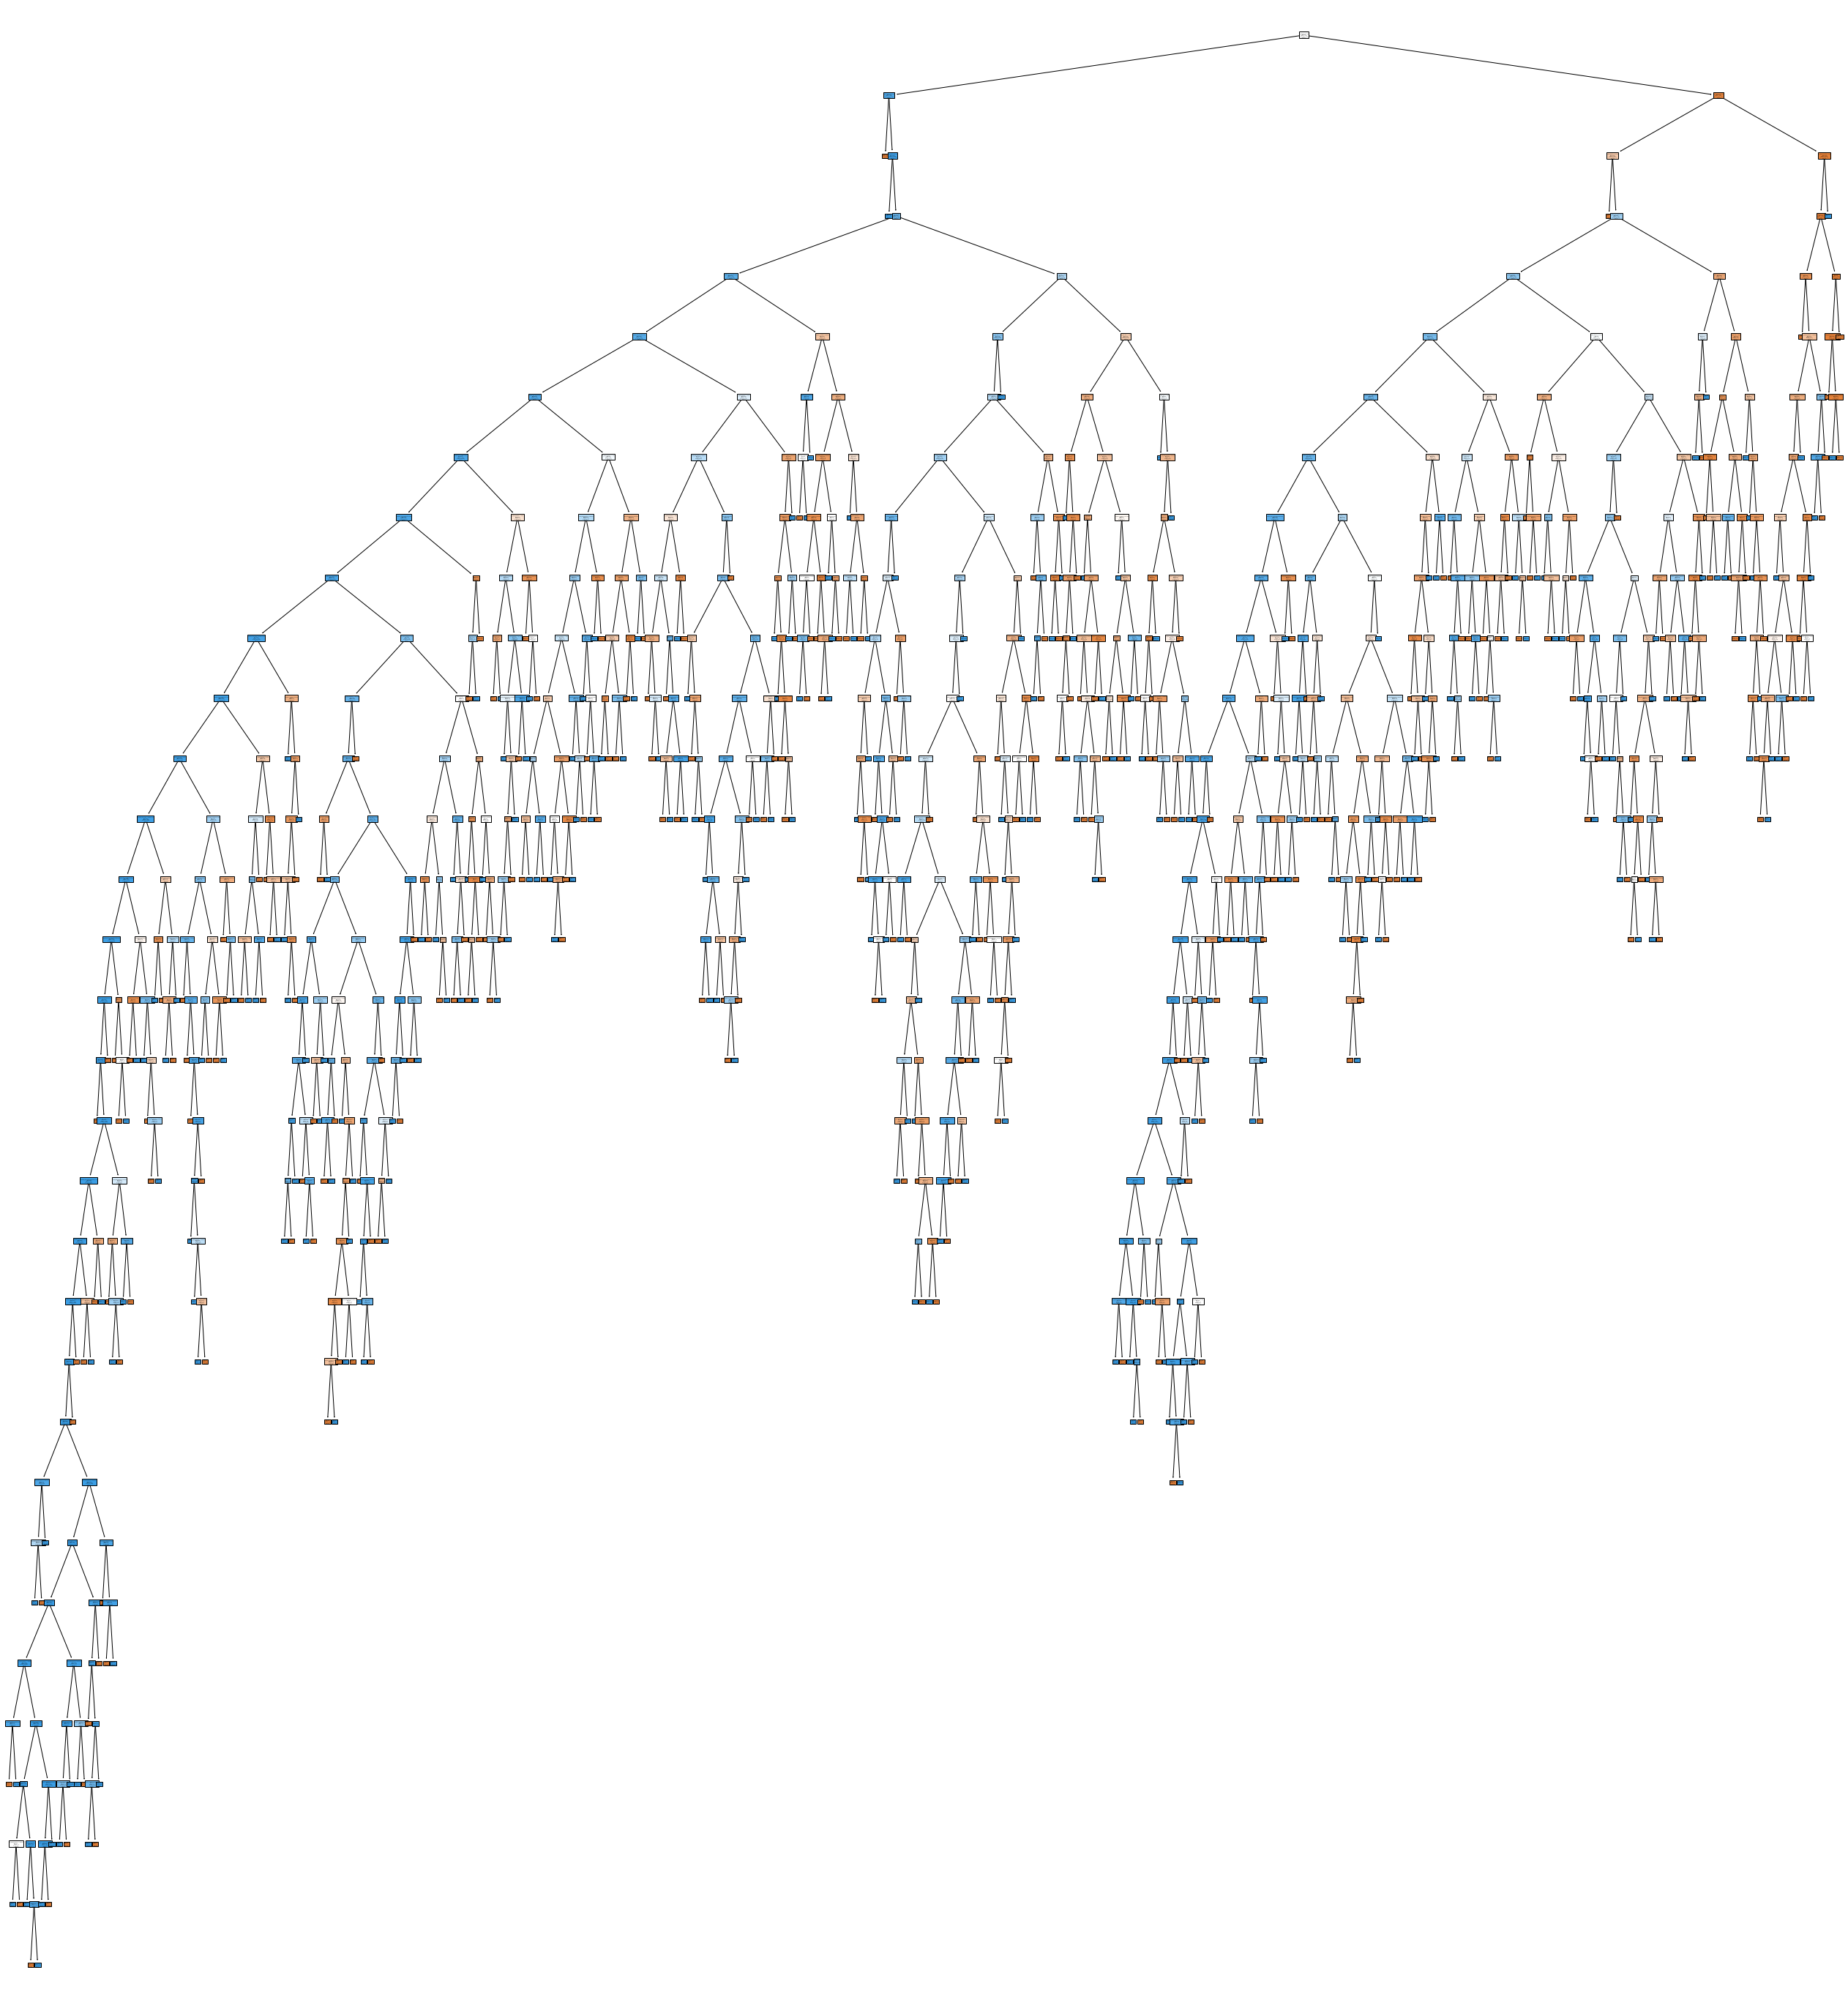

In [94]:
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(DT_model,
                   feature_names=X_train.columns,  
                   class_names=["0","1"],
                   filled=True)

In [96]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [96]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
DT_model=DecisionTreeClassifier(random_state=10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = DT_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

In [97]:
DT_model=DecisionTreeClassifier(criterion='gini',max_depth=6,max_features='sqrt',max_leaf_nodes=9,min_samples_leaf=1,min_samples_split=2)
scores=cross_val_score(estimator=DT_model,X=X_train,y=y_train,cv=10,scoring='roc_auc')
round(scores.mean(),2)

0.95

In [98]:
scores.std()

0.040334608696989384

In [98]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23763
           1       1.00      1.00      1.00     23763

    accuracy                           1.00     47526
   macro avg       1.00      1.00      1.00     47526
weighted avg       1.00      1.00      1.00     47526



In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10176
           1       0.80      0.86      0.83       981

    accuracy                           0.97     11157
   macro avg       0.90      0.92      0.91     11157
weighted avg       0.97      0.97      0.97     11157



RANDOM FOREST CLASSIFIER

In [101]:
rfe_classification=RandomForestClassifier(n_estimators=10,random_state=10)
rfe_model=rfe_classification.fit(X_train,y_train)

In [102]:
tuned_parameters=[{'criterion':['entropy', 'gini'],
'n_estimators' : [90, 100, 150, 200],
'max_depth' :[10, 15, 20],
'min_samples_split' : [2, 5, 8]}]
model=RandomForestClassifier()
tree_grid=GridSearchCV(estimator=model,param_grid=tuned_parameters,cv=5)
tree_grid.fit(X_train,y_train)
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 5,
 'n_estimators': 100}

In [106]:
rfe_model=RandomForestClassifier(criterion='gini',n_estimators=100,max_depth=20,min_samples_split=5)
scores=cross_val_score(estimator=rfe_model,X=X_train,y=y_train,cv=10,scoring='roc_auc')
round(scores.mean(),2)


1.0

In [103]:
y_test_pred=rfe_model.predict(x_test)
y_train_pred=rfe_model.predict(X_train)

In [104]:
Train_accuracy=accuracy_score(y_train,y_train_pred)

In [105]:
Test_accuracy=accuracy_score(y_test,y_test_pred)

In [106]:
print(' random forest classifier train score:',Train_accuracy)
print(' random forest classifier test score:',Test_accuracy)

 random forest classifier train score: 0.9993477254555401
 random forest classifier test score: 0.9741866093035763


In [107]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23763
           1       1.00      1.00      1.00     23763

    accuracy                           1.00     47526
   macro avg       1.00      1.00      1.00     47526
weighted avg       1.00      1.00      1.00     47526



In [108]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10176
           1       0.88      0.82      0.85       981

    accuracy                           0.97     11157
   macro avg       0.93      0.90      0.92     11157
weighted avg       0.97      0.97      0.97     11157



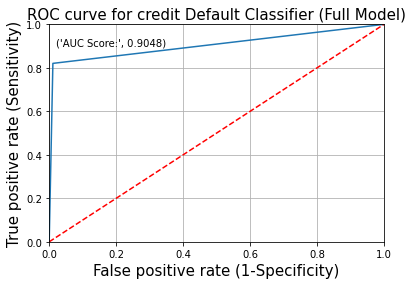

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for credit Default Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_test_pred),4)))
                               

plt.grid(True)

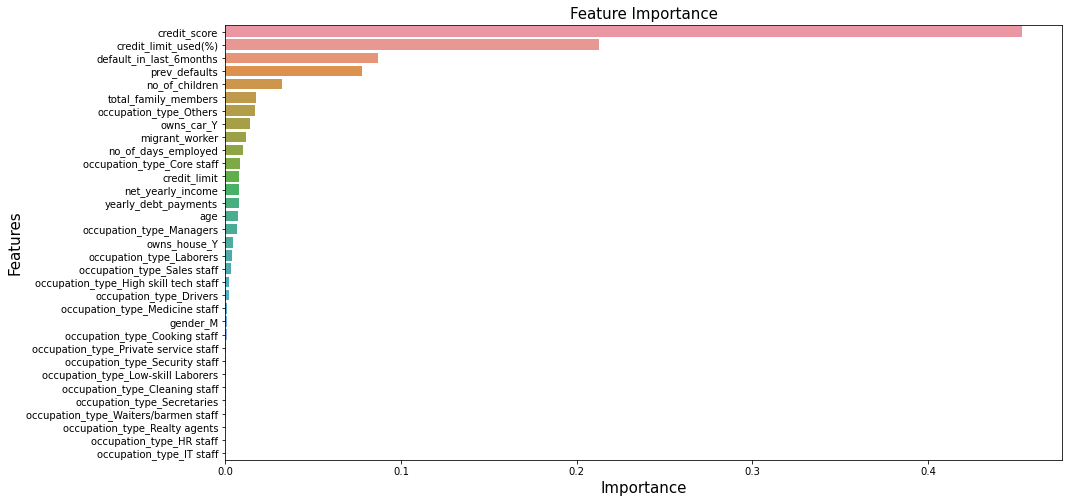

In [110]:
plt.figure(figsize=[15,8])
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rfe_model.feature_importances_})


important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

XGBCLASSIFIER

In [111]:
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

In [112]:
model=XGBClassifier()
model.fit(X_train,y_train)

[17:24:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
y_train_pred=model.predict(X_train)

In [114]:
y_test_pred=model.predict(x_test)

In [115]:
Train_accuracy=accuracy_score(y_train,y_train_pred)

In [116]:
Test_accuracy=accuracy_score(y_test,y_test_pred)

In [117]:
print('Exterme Gradient boosting  classifier train score:',Train_accuracy)
print('Exterme Gradient boosting classifier test score:',Test_accuracy)

Exterme Gradient boosting  classifier train score: 0.9994108487985524
Exterme Gradient boosting classifier test score: 0.9723043828986286


In [118]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23763
           1       1.00      1.00      1.00     23763

    accuracy                           1.00     47526
   macro avg       1.00      1.00      1.00     47526
weighted avg       1.00      1.00      1.00     47526



In [119]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10176
           1       0.85      0.84      0.84       981

    accuracy                           0.97     11157
   macro avg       0.92      0.91      0.91     11157
weighted avg       0.97      0.97      0.97     11157



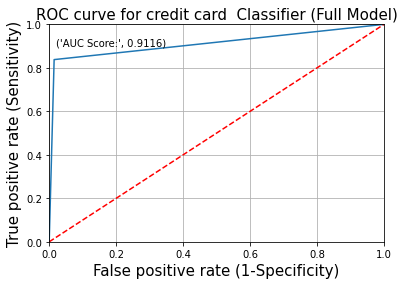

In [120]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for credit card  Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_test_pred),4)))

plt.grid(True)

<Figure size 1800x576 with 0 Axes>

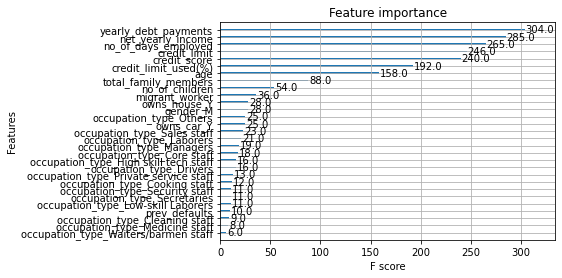

In [121]:
plt.figure(figsize=[25,8])
from xgboost import plot_importance

plot_importance(model)
plt.show()

XGBRCLASSIFIER

In [122]:
model=XGBRFClassifier()
model.fit(X_train,y_train)

[17:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [123]:
y_train_pred=model.predict(X_train)

In [124]:
y_test_pred=model.predict(x_test)

In [125]:
Train_accuracy=accuracy_score(y_train,y_train_pred)

In [126]:
Test_accuracy=accuracy_score(y_test,y_test_pred)

In [127]:
print('Exterme Gradient boosting random forest classifier train score:',Train_accuracy)
print('Exterme Gradient boosting random forest classifier test score:',Test_accuracy)

Exterme Gradient boosting random forest classifier train score: 0.9796953246643942
Exterme Gradient boosting random forest classifier test score: 0.9595769472080309


In [128]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     23763
           1       0.96      1.00      0.98     23763

    accuracy                           0.98     47526
   macro avg       0.98      0.98      0.98     47526
weighted avg       0.98      0.98      0.98     47526



In [129]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     10176
           1       0.70      0.96      0.81       981

    accuracy                           0.96     11157
   macro avg       0.85      0.96      0.89     11157
weighted avg       0.97      0.96      0.96     11157



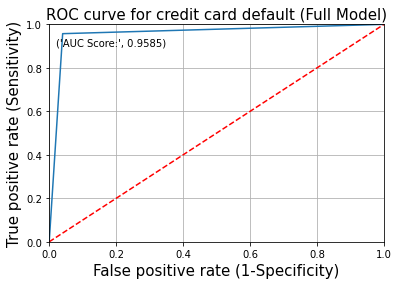

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for credit card default (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_test_pred),4)))
                               
# plot the grid
plt.grid(True)

GRADIENT BOOSTING CLASSIFIER

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
gb_model=GradientBoostingClassifier()

In [132]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [134]:
y_train_pred=gb_model.predict(X_train)

In [135]:
y_test_pred=gb_model.predict(x_test)

In [142]:
Train_accuracy=accuracy_score(y_train,y_train_pred)
Test_accuracy=accuracy_score(y_test,y_test_pred)


print('Gradient Boosting Training accuracy:',Train_accuracy)

print('Gradient Boosting Testing accuracy:',Test_accuracy)

Gradient Boosting Training accuracy: 0.964865207470633
Gradient Boosting Testing accuracy: 0.9687471935339022


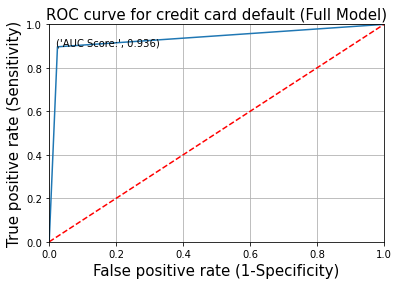

In [137]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)


plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for credit card default (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_test_pred),4)))
                               
# plot the grid
plt.grid(True)

In [138]:
gb_model.feature_importances_

array([0.00000000e+00, 3.21304786e-04, 8.21884517e-06, 1.42229517e-04,
       2.66203360e-03, 2.44213192e-03, 7.61362960e-06, 2.35424175e-17,
       1.54577003e-01, 8.33560173e-01, 2.17066504e-04, 2.56519179e-04,
       0.00000000e+00, 1.19211891e-03, 5.53025608e-04, 0.00000000e+00,
       9.23005908e-06, 1.02271750e-03, 9.54164301e-05, 0.00000000e+00,
       3.30767853e-04, 0.00000000e+00, 1.57745303e-04, 9.92332888e-06,
       3.40687013e-04, 4.72494558e-05, 1.37557463e-03, 9.23313253e-05,
       0.00000000e+00, 5.36189873e-04, 3.32173174e-05, 9.51099178e-06,
       0.00000000e+00])

In [139]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [140]:
precision=TP/(TP+FP)
print('precision',precision)
sensitivity=TP/(TP+FN)
print('sensitivity',sensitivity)


precision 0.8041825095057035
sensitivity 0.8623853211009175


In [102]:
from sklearn import svm



In [103]:
clf = svm.SVC(kernel='linear')

In [104]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [138]:
y_train_pred=clf.predict(X_train)

In [105]:
y_pred = clf.predict(x_test)

In [139]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_train,y_train_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.964865207470633
Accuracy: 0.9558149977548271


In [140]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     23666
           1       0.96      0.97      0.97     23666

    accuracy                           0.96     47332
   macro avg       0.96      0.96      0.96     47332
weighted avg       0.96      0.96      0.96     47332



In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     10205
           1       0.67      0.94      0.78       930

    accuracy                           0.96     11135
   macro avg       0.83      0.95      0.88     11135
weighted avg       0.97      0.96      0.96     11135



<AxesSubplot:>

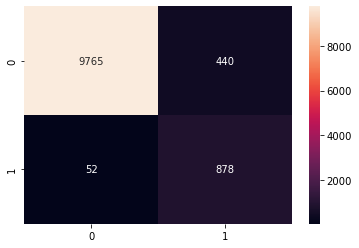

In [109]:
cm= confusion_matrix(y_test, y_pred)  
sns.heatmap(cm,annot=True,fmt='.5g')

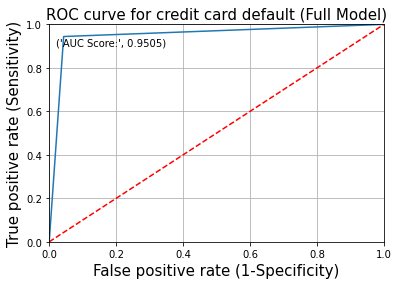

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for credit card default (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

In [ ]:
df_test=pd.read_csv('test.csv')
df_test

In [ ]:
df_test.dtypes

In [ ]:
df_test=df_test.drop(['customer_id','name'],axis=1)
df_test

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test['gender'].isnull().sum()

In [ ]:
df_test['gender']=df_test['gender'].replace(np.nan,df_test['gender'].mode()[0])
df_test['gender']

In [ ]:
df_test['occupation_type'].value_counts()

In [ ]:
df_test['gender'] = df_test['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df_test['gender'].value_counts()

df_test['no_of_children']=df_test['no_of_children'].fillna(df_test['no_of_children'].mode()[0])
df_test['no_of_children'].isnull().sum()

    

df_test['owns_car']=df_test['owns_car'].fillna(df_test['owns_car'].mode()[0])
df_test['owns_car'].isnull().sum()

df_test['migrant_worker']=df_test['migrant_worker'].fillna(df_test['migrant_worker'].mode()[0])
df_test['migrant_worker'].isnull().sum()

df_test['no_of_days_employed']=df_test['no_of_days_employed'].fillna(df_test['no_of_days_employed'].median())
df_test['yearly_debt_payments']=df_test['yearly_debt_payments'].fillna(df_test['yearly_debt_payments'].median())

df_test['credit_score']=df_test['credit_score'].fillna(df_test['credit_score'].median())

df_test['total_family_members']=df_test['total_family_members'].fillna(df_test['total_family_members'].mode()[0])
df_test['total_family_members'].isnull().sum()

df_test['occupation_type']=df_test['occupation_type'].replace({'Unknown':'Others'})
df_test['occupation_type']

df_test.isnull().sum()*100/df_test.isnull().count()

df_test['credit_score'].isnull().sum()

In [ ]:
df_test=df_test.select_dtypes(include='object')
df_test

In [ ]:
num_col=df_test.select_dtypes(np.number)
num_col

In [ ]:
cat_col=pd.get_dummies(cat_col,drop_first=True)
cat_col